# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [1]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [5]:
from sklearn.svm import SVR, SVC  # Regression, Classification
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀 모델 (SVR)

In [6]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

model = SVR()
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("학습 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.2177283706374875
학습 데이터 점수: 0.13544178468518187


### SVM을 사용한 분류 모델 (SVC)

In [8]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

model = SVC()
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("학습 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9014084507042254
학습 데이터 점수: 0.9230769230769231


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

https://blog.naver.com/PostView.naver?blogId=gdpresent&logNo=221723178689&categoryNo=61&parentCategoryNo=0&viewDate=&currentPage=2&postListTopCurrentPage=&from=&userTopListOpen=true&userTopListCount=5&userTopListManageOpen=false&userTopListCurrentPage=2

![kernel trick](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png)

In [10]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linear_svr = SVR(kernel = 'linear')
linear_svr.fit(X_train, y_train)

print("Linear SVR 학습 데이터 점수: {}".format(linear_svr.score(X_train, y_train)))
print("Linear SVR 학습 데이터 점수: {}".format(linear_svr.score(X_test, y_test)))

polynomial_svr = SVR(kernel = 'poly')
polynomial_svr.fit(X_train, y_train)

print("Polynomial SVR 학습 데이터 점수: {}".format(polynomial_svr.score(X_train, y_train)))
print("Polynomial SVR 학습 데이터 점수: {}".format(polynomial_svr.score(X_test, y_test)))

rbf_svr = SVR(kernel = 'rbf')
rbf_svr.fit(X_train, y_train)

print("RBF SVR 학습 데이터 점수: {}".format(rbf_svr.score(X_train, y_train)))
print("RBF SVR 학습 데이터 점수: {}".format(rbf_svr.score(X_test, y_test)))

Linear SVR 학습 데이터 점수: 0.715506620496448
Linear SVR 학습 데이터 점수: 0.6380398541506058
Polynomial SVR 학습 데이터 점수: 0.2024454261446289
Polynomial SVR 학습 데이터 점수: 0.133668450367462
RBF SVR 학습 데이터 점수: 0.2177283706374875
RBF SVR 학습 데이터 점수: 0.13544178468518187


In [11]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linear_svc = SVC(kernel = 'linear')
linear_svc.fit(X_train, y_train)

print("Linear SVC 학습 데이터 점수: {}".format(linear_svc.score(X_train, y_train)))
print("Linear SVC 학습 데이터 점수: {}".format(linear_svc.score(X_test, y_test)))

polynomial_svc = SVC(kernel = 'poly')
polynomial_svc.fit(X_train, y_train)

print("Polynomial SVC 학습 데이터 점수: {}".format(polynomial_svc.score(X_train, y_train)))
print("Polynomial SVC 학습 데이터 점수: {}".format(polynomial_svc.score(X_test, y_test)))

rbf_svc = SVC(kernel = 'rbf')
rbf_svc.fit(X_train, y_train)

print("RBF SVC 학습 데이터 점수: {}".format(rbf_svc.score(X_train, y_train)))
print("RBF SVC 학습 데이터 점수: {}".format(rbf_svc.score(X_test, y_test)))

Linear SVC 학습 데이터 점수: 0.960093896713615
Linear SVC 학습 데이터 점수: 0.986013986013986
Polynomial SVC 학습 데이터 점수: 0.9014084507042254
Polynomial SVC 학습 데이터 점수: 0.9230769230769231
RBF SVC 학습 데이터 점수: 0.9014084507042254
RBF SVC 학습 데이터 점수: 0.9230769230769231


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [ ]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [14]:
polynomial_svc = SVC(kernel = 'poly', degree = 2, C = 0.1, gamma = 'auto')
polynomial_svc.fit(X_train, y_train)

print("kernel = poly, degree = {}, C = {}, gamma = {}".format(2, 0.1, 'auto'))
print("Polynomial SVC 학습 데이터 점수: {}".format(polynomial_svc.score(X_train, y_train)))
print("Polynomial SVC 학습 데이터 점수: {}".format(polynomial_svc.score(X_test, y_test)))

kernel = poly, degree = 2, C = 0.1, gamma = auto
Polynomial SVC 학습 데이터 점수: 0.9835680751173709
Polynomial SVC 학습 데이터 점수: 0.993006993006993


In [16]:
rbf_svc = SVC(kernel = 'rbf', C = 1.5, gamma = 'scale')
rbf_svc.fit(X_train, y_train)

print("kernel = poly, C = {}, gamma = {}".format(1.5, 'scale'))
print("RBF SVC 학습 데이터 점수: {}".format(rbf_svc.score(X_train, y_train)))
print("RBF SVC 학습 데이터 점수: {}".format(rbf_svc.score(X_test, y_test)))

kernel = poly, C = 1.5, gamma = scale
RBF SVC 학습 데이터 점수: 0.9061032863849765
RBF SVC 학습 데이터 점수: 0.9370629370629371


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [21]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [18]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수: {}".format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9014084507042254
SVC 평가 데이터 점수: 0.9230769230769231


In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [20]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수: {}".format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9835680751173709
SVC 평가 데이터 점수: 0.986013986013986


In [22]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [23]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수: {}".format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9812206572769953
SVC 평가 데이터 점수: 0.9300699300699301


## Linear SVR

### 보스턴 주택 가격

In [24]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:
model = SVR(kernel = 'linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7294495355666559
평가 데이터 점수: 0.6294216963307007


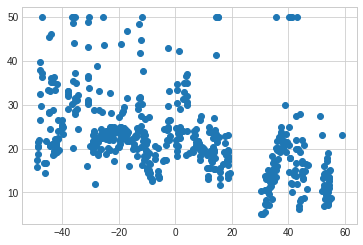

In [28]:
X_comp = TSNE(n_components = 1).fit_transform(X) # 저차원 변형
plt.scatter(X_comp, y);

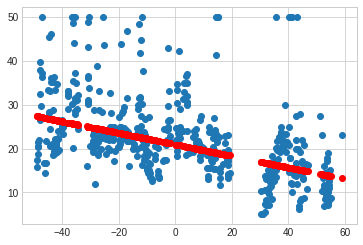

In [29]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color = 'r')

In [32]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

cross_validate(
    estimator = estimator,
    X = X, y= y,
    cv =5,
    n_jobs =  multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.2s finished


{'fit_time': array([0.02878428, 0.02957988, 0.02660704, 0.02771616, 0.03223944]),
 'score_time': array([0.00281572, 0.00273418, 0.00234127, 0.00215173, 0.00234079]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [34]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel = 'linear'))])

param_grid = [{'model__gamma':['scale', 'auto'],
               'model__C':[1.0, 0.1, 0.01],
               'model__epsilon':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True # 로그 메시지 출력
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='linear',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gam

In [35]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

### 당뇨병

## Kernel SVR

### 보스턴 주택 가격

### 당뇨병

## Linear SVC

### 유방암

### 붓꽃

### 와인

## Kernel SVC

### 유방암

### 붓꽃

### 와인